In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

In [2]:
cols = [#'bayesian_prediction_std_bal_acc',
        #'bayesian_prediction_std_f1_score', 
        #'bayesian_prediction_std_auc',
        'epochs',
        'bayesian_entropy__bal_acc', 
        #'bayesian_entropy_f1_score',
        'bayesian_entropy__auc']

In [5]:
#experiments = ['bayesian', 'mlp_dropout', 'mlp_deterministic', 'poor_bayesian']
experiments = ['mlp_dropout', 'mlp_deterministic', 'poor_bayesian']

In [6]:
dfs = []
for exp in experiments:
    df_with = pd.read_csv(exp+'_uncertainty_with_unknown.csv')
    df_with_results = df_with.groupby(['inside_labels', 'unknown_labels']).mean()[cols]
    df_without = pd.read_csv(exp+'_uncertainty_without_unknown.csv')
    df_without_results = df_without.groupby(['inside_labels', 'unknown_labels']).mean()[cols]
    dfs.append([exp, df_with_results, df_without_results])

In [7]:
results_cols = ['inside', 'outside',
                'in_epochs', 'out_epochs',
                'in_entropy_acc', 'out_entropy_acc',
                'in_entropy_auc', 'out_entropy_auc']

dfs_results = []
for exp, df_with, df_without in dfs:
    results = pd.DataFrame(columns=results_cols)
    for (in_key, *in_row), (out_key, *out_row) in zip(df_with.itertuples(), df_without.itertuples()):
        assert in_key == out_key
        results.loc[len(results)] = [
            in_key[0], in_key[1],
            in_row[0], out_row[0],
            in_row[1], out_row[1],
            in_row[2], out_row[2],
        ]
    dfs_results.append([exp, results])

In [8]:
final_results_cols = ['inside', 'outside']
for c in results_cols[2:]:
    for exp, _ in dfs_results:
        final_results_cols.append(exp+'_'+c)

In [9]:
final_results = pd.DataFrame(columns=final_results_cols)
for key_row  in zip(*[df.itertuples() for exp, df in dfs_results]):
    for i in range(1, len(key_row)):
        _, *prev_row = key_row[i-1]
        _, *row = key_row[i]
        assert prev_row[0] == row[0]
        assert prev_row[1] == row[1]
        
    _, *row = key_row[0]
    new_row = [row[0], row[1]]
    
    for c in range(2, len(results_cols)):
        for _, *row in key_row:
            new_row.append(row[c])

    final_results.loc[len(final_results)] = new_row

In [10]:
final_results.columns

Index(['inside', 'outside', 'mlp_dropout_in_epochs',
       'mlp_deterministic_in_epochs', 'poor_bayesian_in_epochs',
       'mlp_dropout_out_epochs', 'mlp_deterministic_out_epochs',
       'poor_bayesian_out_epochs', 'mlp_dropout_in_entropy_acc',
       'mlp_deterministic_in_entropy_acc', 'poor_bayesian_in_entropy_acc',
       'mlp_dropout_out_entropy_acc', 'mlp_deterministic_out_entropy_acc',
       'poor_bayesian_out_entropy_acc', 'mlp_dropout_in_entropy_auc',
       'mlp_deterministic_in_entropy_auc', 'poor_bayesian_in_entropy_auc',
       'mlp_dropout_out_entropy_auc', 'mlp_deterministic_out_entropy_auc',
       'poor_bayesian_out_entropy_auc'],
      dtype='object')

<IPython.core.display.Javascript object>


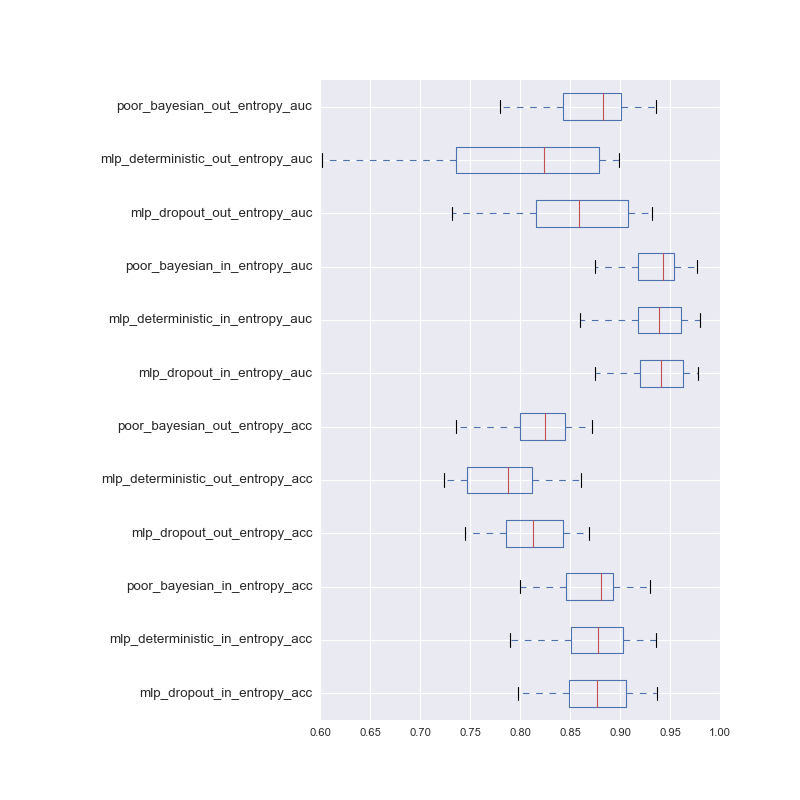

In [12]:
plt.figure()
plt.rcParams['figure.figsize'] = (10, 10)
final_results.boxplot(return_type='axes', vert=False, column=list(final_results.columns)[8:])
plt.subplots_adjust(left=0.4)

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = (10, 5)
final_results.boxplot(return_type='axes', vert=False, column=list(final_results.columns)[2:10])
plt.subplots_adjust(left=0.4)